In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,
         'arakawa':34, 'cg':42}

In [4]:
#read in csv file
df1 = pd.read_csv('benchmark_skl_mpi1.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']/1e6)
for name, mem in memops.items():
    df1[name] = df1['size']/1000*mem/df1[name]
dfr = df1[['n','Nx','Ny','size']+list(memops.keys())]
dfr[(dfr['n']==3) & (dfr['Nx']==544)]

,n,Nx,Ny,size,dy,scal,cg,dx,pointwiseDot,dot,arakawa,axpby


In [5]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','size'])

In [6]:
#dfr['axpby']

In [7]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 2048 2048 
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [8]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [12]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
efficiency.iloc[0:20]

,n,Nx,Ny,size,dy,scal,cg,dx,pointwiseDot,dot,arakawa,axpby,dy,scal,cg,dx,pointwiseDot,dot,arakawa,axpby
,,,,,eff,eff,eff,eff,eff,eff,eff,eff,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err
0,2,144,144,0.66,0.16,1.44,0.53,0.45,2.89,0.26,0.57,2.05,1.56e-02,0.07,4.18e-02,6.94e-02,3.35e-01,0.01,7.13e-03,0.21
8,3,144,144,1.49,0.29,3.35,0.73,0.80,6.77,0.45,0.81,5.07,3.78e-03,0.16,2.07e-02,6.07e-02,2.00e-01,0.01,1.36e-02,0.13
1,2,288,288,2.65,0.47,5.43,1.03,0.84,7.57,0.55,1.31,6.58,3.11e-02,0.16,2.03e-02,2.27e-02,4.10e-01,0.06,8.49e-03,0.28
16,4,144,144,2.65,0.31,5.50,0.72,0.66,7.64,0.56,0.87,6.57,3.15e-03,0.15,1.17e-02,2.21e-02,1.92e-01,0.04,1.67e-02,0.50
24,5,144,144,4.15,0.31,7.61,0.74,0.63,10.52,0.66,0.78,10.63,2.33e-03,0.14,1.32e-02,3.07e-02,2.28e+00,0.02,1.78e-03,0.23
2,2,384,384,4.72,0.61,8.40,1.18,0.90,8.97,0.68,1.59,9.11,8.08e-03,0.29,5.14e-02,2.44e-02,3.27e-01,0.04,1.71e-02,0.31
9,3,288,288,5.97,0.52,9.82,1.02,0.79,9.50,0.69,1.21,10.09,3.86e-03,0.22,1.01e-02,3.85e-02,7.22e-01,0.02,7.80e-03,0.64
3,2,576,576,10.62,0.82,12.86,1.43,0.93,5.63,0.67,1.63,12.56,5.08e-03,0.15,3.99e-02,4.41e-02,1.10e+00,0.04,2.27e-02,0.33
17,4,288,288,10.62,0.45,11.96,1.06,0.72,5.24,0.67,0.99,11.96,8.20e-02,1.85,2.38e-02,3.14e-02,1.49e+00,0.09,1.75e-01,0.50


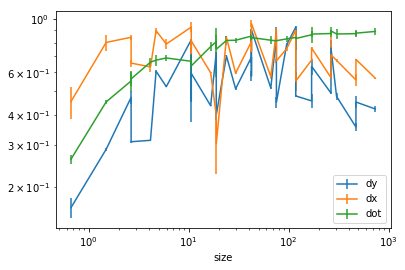

In [10]:
fig=plt.figure()
ax = efficiency['dy'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err')
ax = efficiency['dx'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
ax = efficiency['dot'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
plt.yscale('log')
ax.legend(['dy','dx','dot'])

/home/matthias/.local/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


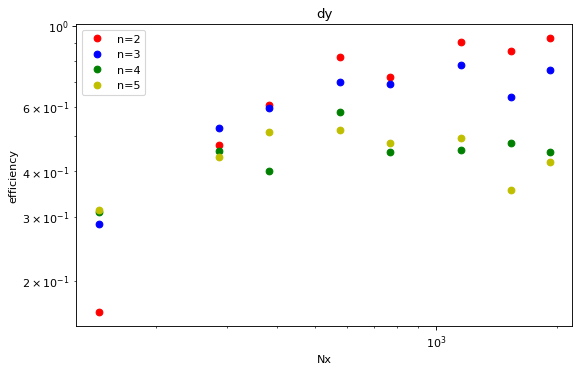

220.81192271222767

In [11]:
fig,ax=plt.subplots(1,1,figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plotlist = [('dy','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
efficiency[efficiency['n']==2].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[0])
efficiency[efficiency['n']==3].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency[efficiency['n']==4].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
efficiency[efficiency['n']==5].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[3])
#plt.loglog()
plt.title(plotlist[0][0])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('efficiency')
plt.xlabel('Nx')
plt.legend(['n=2','n=3','n=4','n=5'])
plt.show()
base_bandwidth